# <font color='blue'> Projeto de análise de Dados com Linguagem Python</font>

### <font color='blue'>Análise de Dados de RH (Recursos Humanos)</font>

### <font color='blue'>Análise Descritiva e Diagnóstica</font>


In [1]:
# Vendo qual é a versão utilizada no python
from platform import python_version
print("A versao utilizada é a:", python_version())

A versao utilizada é a: 3.11.6


## <font color='blue'>Importando as bibliotecas </font>


In [2]:
# Bibliotecas para manipular dados
import pandas as pd
import numpy as np
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Bibliotecas para estatísticas
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
# Bibliotecas de Engenharia de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
# Ignorar mensagens de avisos
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### <font color='blue'>Carregando os dados e visualizando os dados</font>


In [67]:
# Importando meu dataset
df = pd.read_csv("aug_train.csv")

In [68]:
# Visualizando quantas linhas e colunas tenho na minha tabela
df.shape

(19158, 14)

# Visualizando meus atributos

df.columns


In [69]:
# Pegando uma amostra do meu cojunto de dados
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [70]:
# Verificando como o python interpretou minhas variáveis e visualizanddo-as
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## <font color='blue'>Análise exploratória</font>


#### <font color='blue'>Descrevendo minhas variáveis categóricas e numéricas </font>


In [71]:
# Descrevendo minhas variáveis categóricas
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Aqui já percebemos que existe valores ausentes


In [72]:
# Descrevendo minhas variáveis numéricas
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Em `city_development_index` o valor médio é 0,82 , a mediana é 0,90 e o std é 0,12.Isso sifnifica que a maioria dos cantidatos é de cidades desenvolvidas

Em `training_hours` a média é de 65 horas.O máximo é de 336 e o minimo é de 1 (Amplitude Alta). Isso significa que existe uma probabilidade alta de minha variável ter um Outlier, e que a minha variável não segue uma distribuição normal


#### <font color='blue'>Visualizando minhas variáveis categóricas em formato gráfico</font>


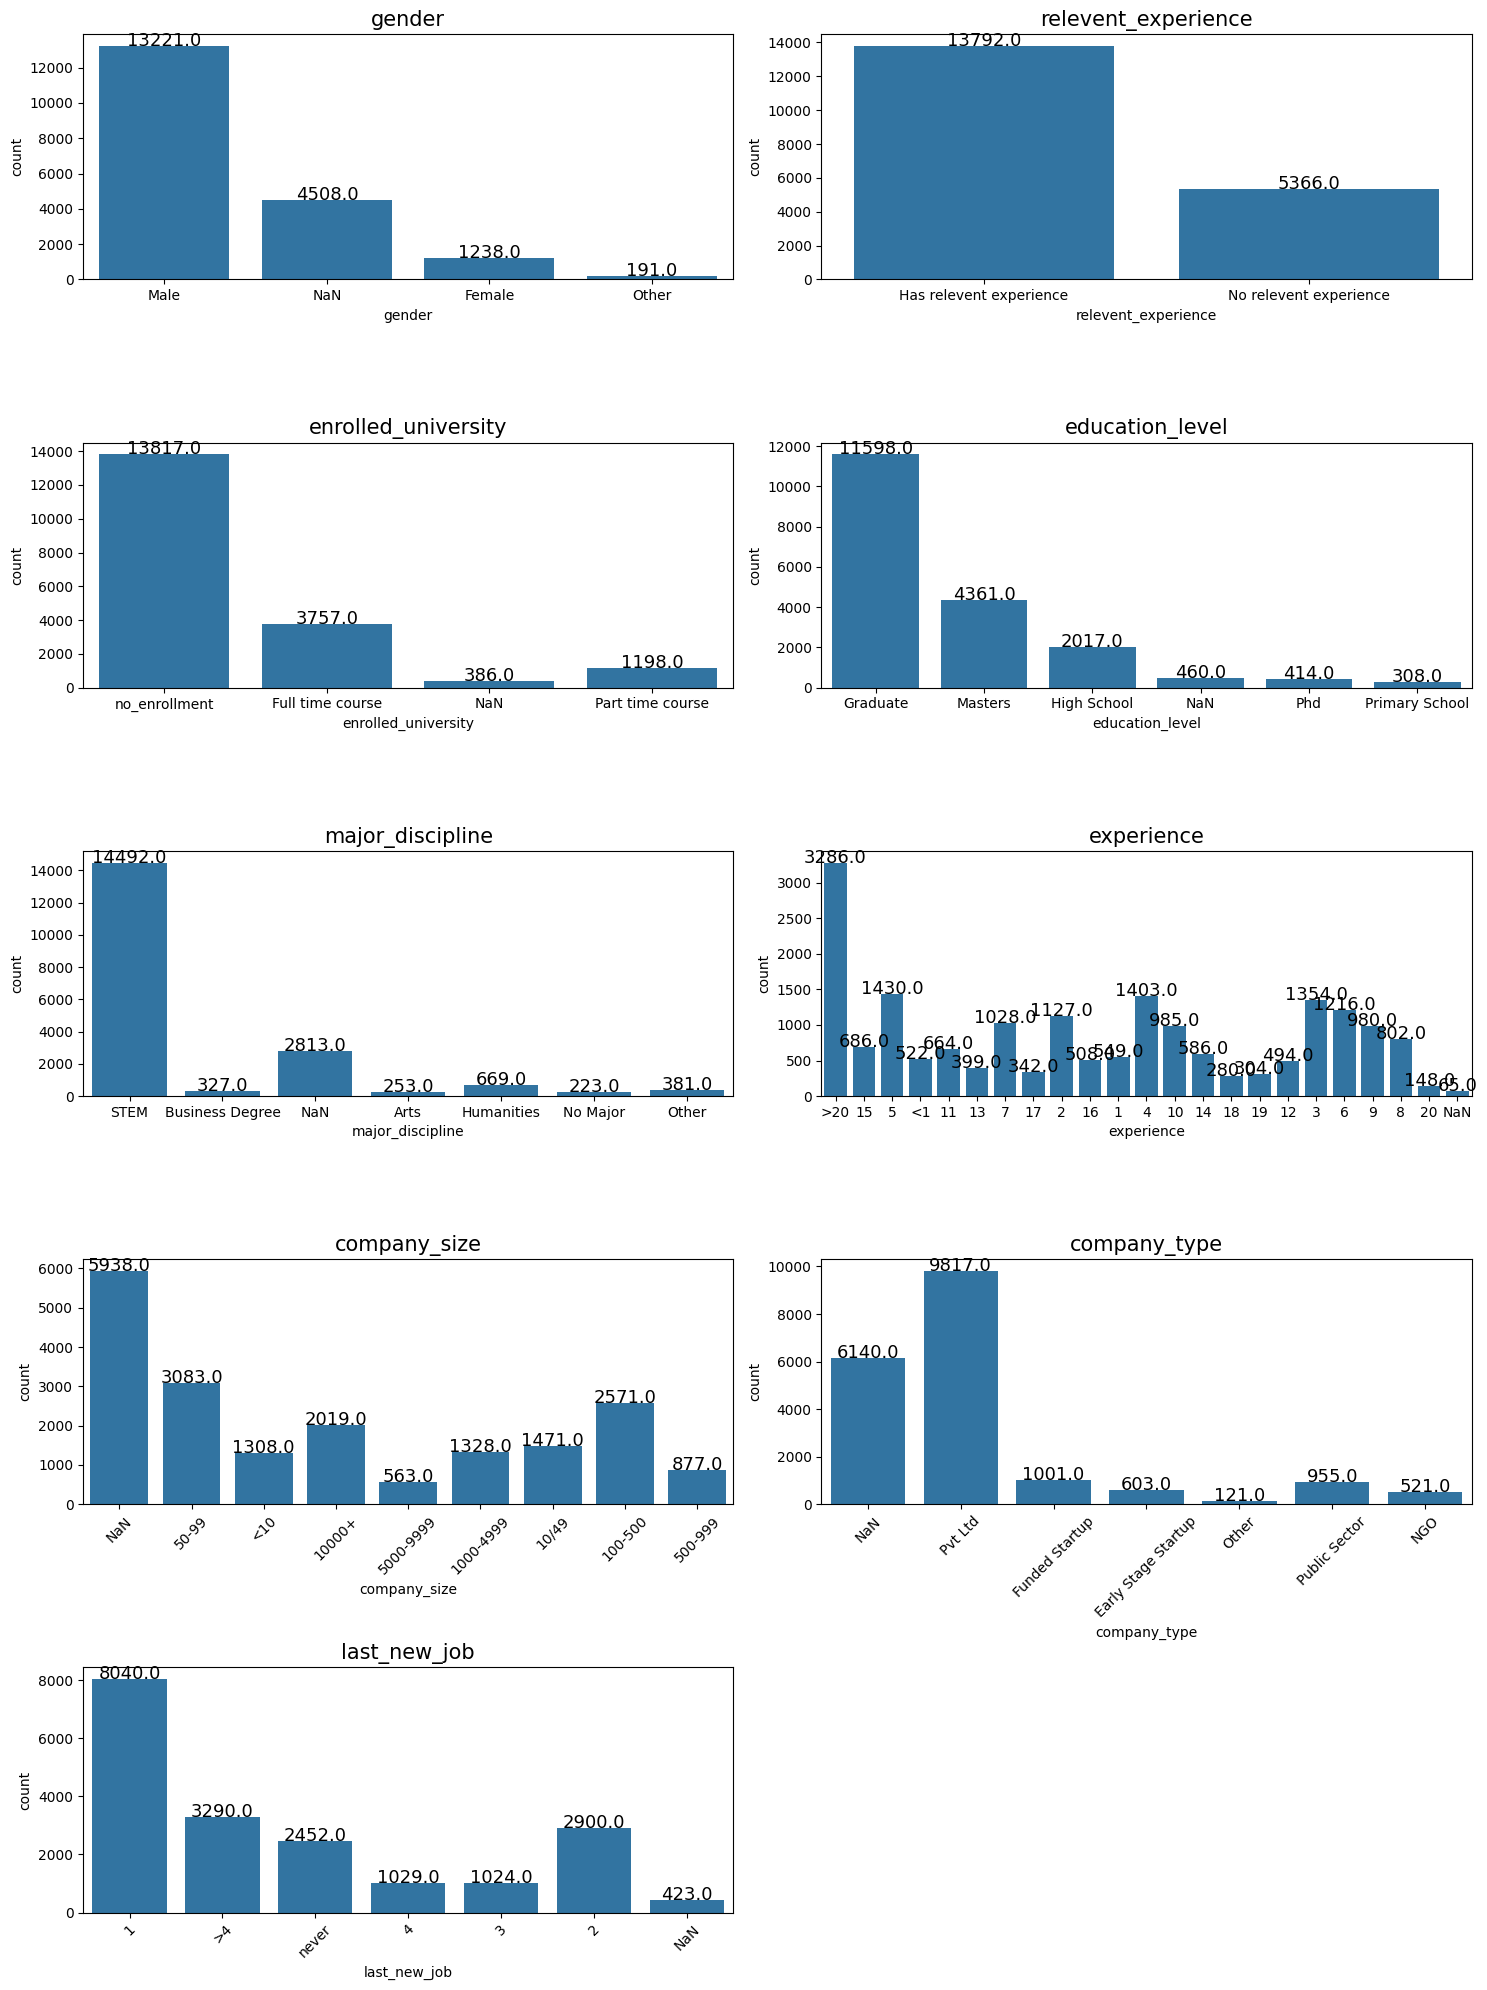

In [73]:
# Determinando os tamanhos(Altura e Largura) da minha área de plotagem
plt.figure(figsize=(15, 20))
# Criando uma lista com minhas variáveis categóricas
column_list = list(df.columns.values)[3:12]

# Criando um Contador
A = 0

# loop(Pecorrer pela minha lista de colunas categóricas e realizando a plotagem)
for i in column_list:
    # Para cada valor na minha lista eu insiro um subgráfico
    A += 1
    # Fazendo sub-gráficos na mesma área de plotagem
    plt.subplot(5, 2, A)
    # Fazendo um gráfico
    ax = sns.countplot(df.fillna('NaN'), x=i)
    # Fazendo os titulos de cada plotagem
    plt.title(i, fontsize=15)
    # Valor de cada barra
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                    p.get_height()), ha='center', color='black', size=13)
    if A >= 7:
        plt.xticks(rotation=45)

 # layout
plt.tight_layout(h_pad=2)

#### <font color='blue'>Verificando a Distribuição das Variáveis Numéricas ( Boxplot e Histograma )</font>


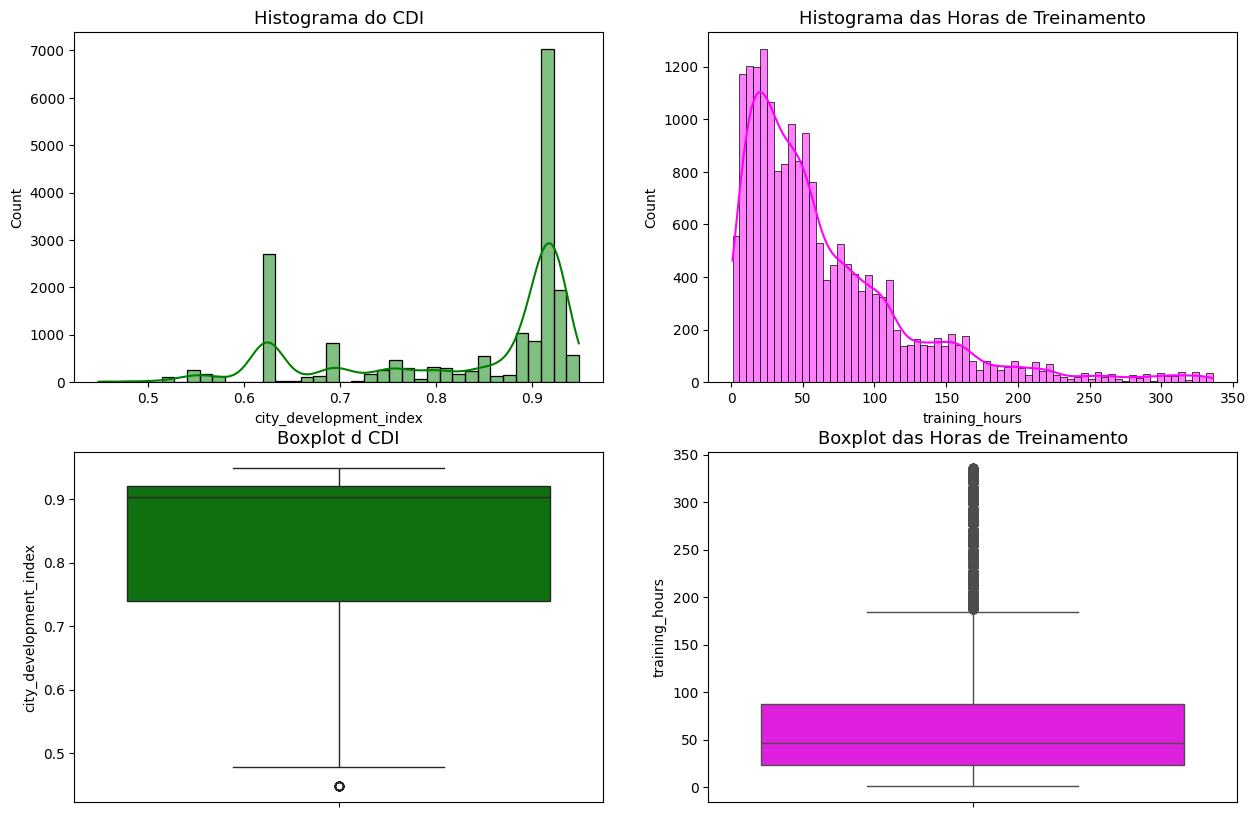

In [74]:
# Determinando os tamanhos(Largura e Altura) da minha área de plotagem
plt.figure(figsize=(15, 10))

# Subplot de histograma do city_development_index
plt.subplot(221)
# Paleta de cores do meu subplot
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde=True, color="green")
# Fazendo o titulo
plt.title('Histograma do CDI', fontsize=13)

# Subplot de histograma do training_hours
plt.subplot(222)
sns.histplot(df['training_hours'], kde=True, color="magenta")
# Fazendo o titulo
plt.title('Histograma das Horas de Treinamento', fontsize=13)

# Subplot de boxplots do city_development_index
plt.subplot(223)
sns.boxplot(df['city_development_index'], color="green")
# Fazendo o titulo
plt.title('Boxplot d CDI', fontsize=13)

# Subplot de boxplot do training_hours
plt.subplot(224)
sns.boxplot(df['training_hours'], color="magenta")
# Fazendo o titulo
plt.title('Boxplot das Horas de Treinamento', fontsize=13)

plt.show()

#### <font color='blue'>Fazendo um teste de normalidade de distribuição ( Validar o gráfico )</font>


In [75]:
# Criando uma Lista com as variáveis numéricas
atributos = ['city_development_index', 'training_hours']

# Loop
for i in atributos:
    # Calculando a normalidade
    stats, pval = normaltest(df[i])
    # Checando o valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


A distribuição é uma função que define o formato da curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

A distribuição normal é uma dessas distribuições na estatítica.Nela, a média, mediana e moda dos dados possuem o mesmo valor.Através dela consigo fazer inferências e padronizar-los utilizando
o Score- Z

As duas variáveis não estão em sua distribuição normal,vemos isso tanto pelo histograma , quanto pelo teste de normalidade de distribuição

Então utilizaremos o método não paramétrico para as duas variáveis numéricas


Já no caso do boxplot consigo ver a presença de Outliers

Os outliers são valores extremos que fogem muita da média.

Nos boxplots consigo ver que as duas variáveis possuem outliers,principalmente na variável `training_hours`


#### <font color='blue'> Seleção de recursos de variáveis numéricas utilizando coeficiente de correlação </font>


Nossa variável alvo é a variável target.

Então iremos veririfcar a correlação das outras variáveis com a variável target

Faremos isso criando um mapa de correlação com as variáveis numéricas


In [76]:
# Visualizando o dataframe
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [77]:
# Criando uma cópia do meu dataframe
df_copia = df.copy()
display(df_copia)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [78]:
# Verificando quantos valores distintos nos temos na variável experience e last_new_job
df[['experience', 'last_new_job']]

,experience,last_new_job
0,>20,1
1,15,>4
2,5,never
3,<1,never
4,>20,4
...,...,...
19153,14,1
19154,14,4
19155,>20,4
19156,<1,2


Consigo notar que as 2 variáveis tem um corportamento mais próxima de uma variável numérica

Então vamos transforma-la!!


In [79]:
# Convertendo a variável experience para numérica
df_copia['experience'] = np.where(
    df_copia['experience'] == "<1", 1, df_copia['experience'])
df_copia['experience'] = np.where(
    df['experience'] == '>20', 20, df_copia['experience'])
# Mudando o tipo da variável para float
df_copia['experience'] = df_copia['experience'].astype(float)

In [80]:
df_copia['last_new_job']

0            1
1           >4
2        never
3        never
4            4
         ...  
19153        1
19154        4
19155        4
19156        2
19157        1
Name: last_new_job, Length: 19158, dtype: object

In [81]:
# Convertendo a variável last_new_job para numérica
df_copia['last_new_job'] = np.where(
    df['last_new_job'] == ">4", 4, df_copia['last_new_job'])
df_copia['last_new_job'] = np.where(
    df['last_new_job'] == 'never', 0, df_copia['last_new_job'])
# Mudando o tipo da variável para float
df_copia['last_new_job'] = df_copia['last_new_job'].astype(float)

In [82]:
# Verificando se deu certo
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

Vamos agora aplicar uma correlação das variáveis numéricas com minha vriável alvo , para entender a relação entre elas


In [83]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [84]:
# Calculando o coeficiente de correlação
df_consulta = df_copia.select_dtypes("float")

df_consulta.corr()

,city_development_index,experience,last_new_job,target
city_development_index,1.000000,0.333372,0.190170,-0.341665
experience,0.333372,1.000000,0.468500,-0.177330
last_new_job,0.190170,0.468500,1.000000,-0.081415
target,-0.341665,-0.177330,-0.081415,1.000000


Text(0.5, 1.0, 'Mapa de correlação das variáveis numéricas\n')

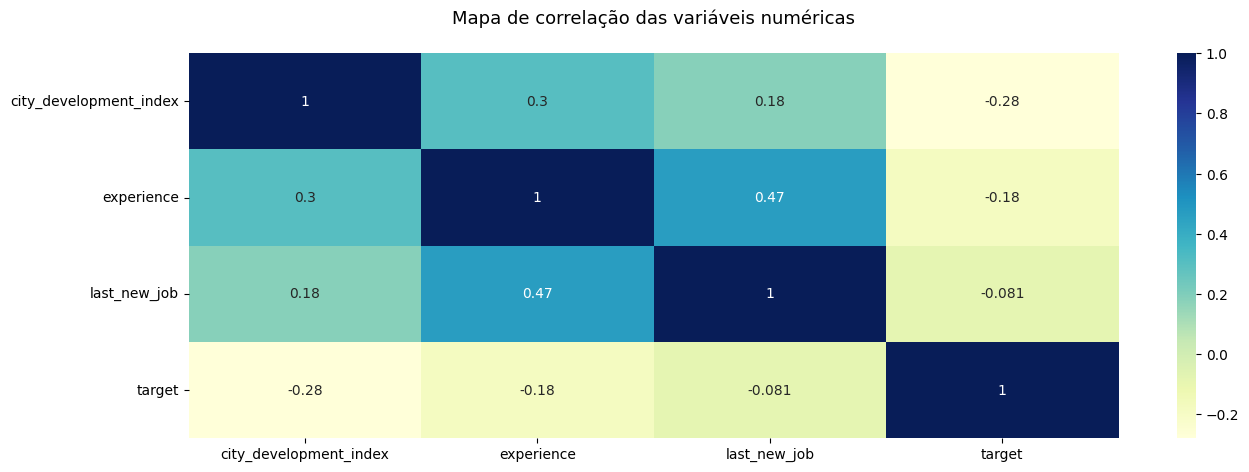

In [85]:
# Indicando a área da minha plotagem
plt.figure(figsize=(15, 5))
# Criando o heatmap
sns.heatmap(df_consulta.corr("spearman"), annot=True, cmap="YlGnBu")
# Colocando o titulo
plt.title('Mapa de correlação das variáveis numéricas\n', fontsize=13)

Pela correlação de spearman, `last_new_job` e `experience` têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis `last_new_job` e `training_hours` tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.


Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE(Peso de evidência) e IV(Valor de informação)


#### <font color='blue'> Seleção de recursos de variáveis categóricas utilizando o WOE (Peso de evidencia) e IV (valor de informação)</font>


In [86]:
# Excluindo as variáveis que não são necessárias e as variáveis numéricas
# Fazendo o Loop
for i in df.drop(columns=["target",
                          'enrollee_id',
                          'city',
                          'city_development_index',
                          'training_hours',
                          'experience',
                          'last_new_job',
                          'company_size']).columns:
    # Criando uma tabela cruzada
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))

    print(df_woe_iv, '\n----------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
----------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
----------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
----------------------------------------------------------------
target          

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão

    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade


<Figure size 1000x500 with 0 Axes>

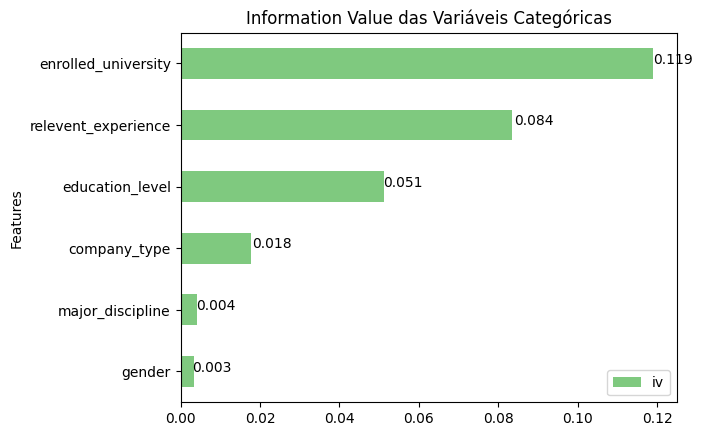

In [87]:
# Criando um gráfico para validar minhas conclusões

# Criando a lista
columns_cat = df.drop(columns=['target',
                               'enrollee_id',
                               'city',
                               'city_development_index',
                               'training_hours',
                               'experience',
                               'last_new_job',
                               'company_size']).columns
# Fazendo a lista do IV
iv = []
# Fazendo o loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Criando o Dataframe
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}
                     ).set_index('Features').sort_values(by='iv')

# Criando o gráfico de barplot
plt.figure(figsize=(10, 5))
df_iv.plot(kind='barh',
           title='Information Value das Variáveis Categóricas', colormap="Accent")
for index, value in enumerate(list(round(df_iv["iv"], 3))):
    plt.text((value), index, str(value))
plt.legend(loc="lower right")
plt.show()

- No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
- Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.


#### <font color='blue'>Indentificando os valores ausentes</font>


In [88]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Há muitos valores ausentes que precisam ser tratados


#### <font color='blue'>Indentificando os valores duplicados </font>


In [89]:
# Indentificando os valores duplicados
df['enrollee_id'].duplicated().sum()

0

Não há valores duplicados


#### <font color='blue'>Indentificando os dados desbalanceados</font>


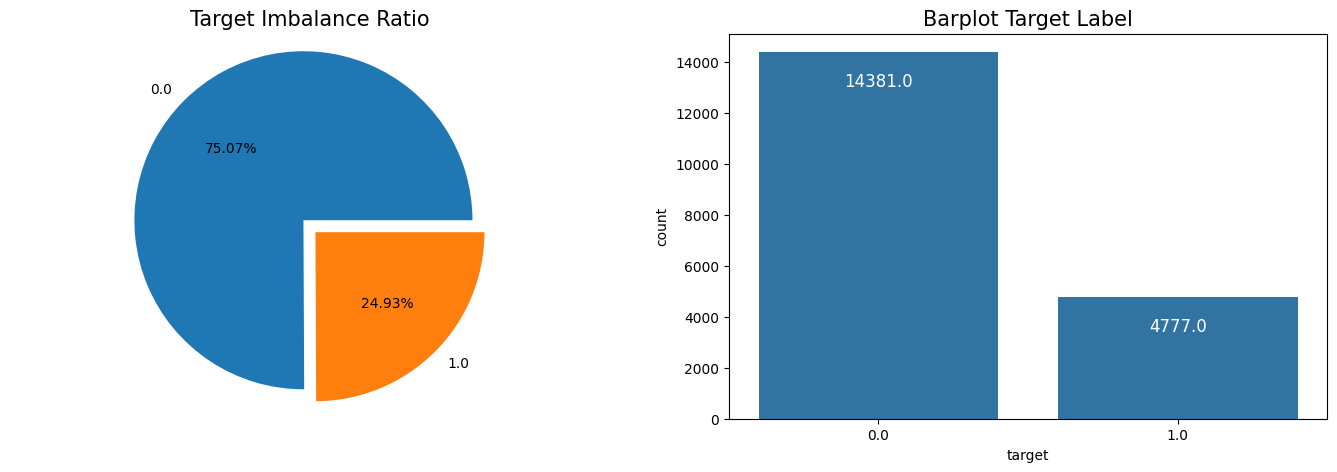

In [90]:
# Fazendo a minha área de plotagem
plt.figure(figsize=(17, (100)/20))

plt.subplot(121)
# Fazendo meu gráfico de pizza
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels=list(df['target'].value_counts().index),
        autopct="%.2f%%",
        explode=(0, 0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size=15)
# Fazendo meu countplot
plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.4,
                 p.get_height()),
                ha='center',
                va='top',
                color='white',
                size=12)

## <font color='blue'>Pré-Processamento dos dados</font>


In [91]:
# Selecionando as colunas do meu dataset
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [92]:
# Selecionando as colunas mais relevantes com base na minha análise exploratória
colunas_manter = ['city_development_index', 'experience', 'enrolled_university', 'relevent_experience', 'education_level', 'company_type', 'major_discipline',
                  'target']
# Criando um dataframe só com as colunas relevantes
new_df = df[colunas_manter]
# Visualizando
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [93]:
new_df.isna().sum()

city_development_index       0
experience                  65
enrolled_university        386
relevent_experience          0
education_level            460
company_type              6140
major_discipline          2813
target                       0
dtype: int64

Notamos que as variávies `city_development_index`, a variável `relevent_experience`e a variável `target`não possuem valores ausentes.Porém as demais sim

Vamos tratar os valores ausentes para cada uma das variáveis que possuem


#### Variável major discipline


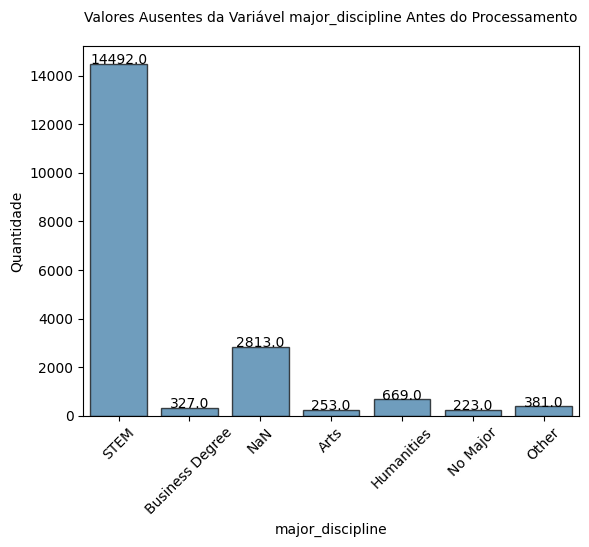

In [94]:
# Visualizando somente a variável
sns.countplot(data=new_df.fillna('NaN'), x='major_discipline',
              alpha=0.7, edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Quantidade', fontsize=10)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                p.get_height()), ha='center', color='black', size=10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize=10)
plt.show()

- Fazendo um propoção

- Relação entre major_discipline x education_level


In [95]:
# Ver a quantidade de valores ausentes em major_discipline
qtd = new_df['major_discipline'].isna().sum()
display("A quantidade de valores ausentes em major discipline é de {}".format(qtd))
# Ver a proporção dos valores ausentes com o education_level
prop = new_df[new_df['major_discipline'].isna(
)]['education_level'].value_counts(dropna=False)
print("A proporção dos valores ausentes com a education_level é de ")
print(prop)

'A quantidade de valores ausentes em major discipline é de 2813'

A proporção dos valores ausentes com a education_level é de 
education_level
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: count, dtype: int64


Dentre os registros com valores ausentes, vemos a proporção na variável `education_level`.

Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.


In [96]:
# Criando um indice que filtre o education level sendo High School e  Primary School
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level'] == 'High School') | (
    new_df['education_level'].isna()) | (new_df['education_level'] == 'Primary School'))]).index

In [97]:
# Imputando o valor ausente baseado no critério
new_df['major_discipline'][nan_index] = 'Non Degree'

In [98]:
# Verificando valores ausentes
print('Total de Valores Ausentes na Variável major_discipline:',
      new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)

Total de Valores Ausentes na Variável major_discipline: 28


major_discipline
STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: count, dtype: int64

Com os valores ausentes que sobraram, iremos denominar de 'Other'


In [99]:
new_df[new_df['major_discipline'].isna()] = 'Other'

In [100]:
# Verificando valores ausentes
print('Total de Valores Ausentes na Variável major_discipline:',
      new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)

Total de Valores Ausentes na Variável major_discipline: 0


major_discipline
STEM               14492
Non Degree          2785
Humanities           669
Other                409
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

#### Variável enrolled university


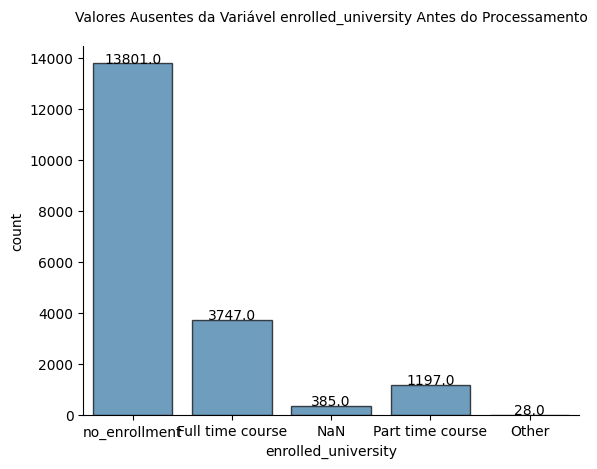

In [101]:
# Visualizando a variavél
sns.countplot(data=new_df.fillna("NaN"), x='enrolled_university',
              alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                p.get_height()), ha='center', color='black', size=10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize=10)
plt.show()

Fazendo uma proporção


In [102]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:',
      new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna(
)]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


education_level
Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: count, dtype: int64

andidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.


In [103]:
# Criando um indice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (
    new_df['education_level'] == 'Primary School')]).index

In [104]:
# Imputando o valor ausente baseado no critério
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [105]:
# Verifcando Depois da imputação
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna(
)]['education_level'].value_counts(dropna=False)

Total de Valores Ausentes: 376


education_level
Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: count, dtype: int64

In [106]:
# Criando o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [107]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

In [108]:
# Verificar nossa Dataframe
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type


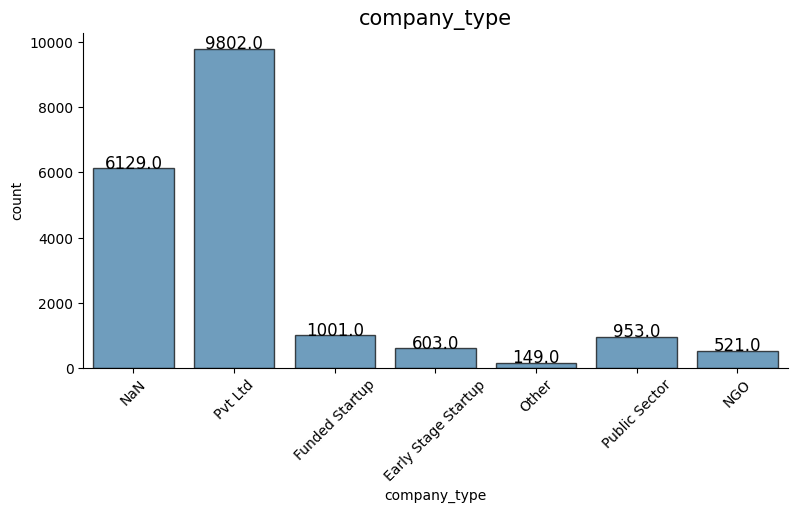

In [109]:
# Fazendo o gráfico
plt.figure(figsize=(20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A += 1
    plt.subplot(4, 2, A)
    ax = sns.countplot(data=new_df.fillna('NaN'), x=i,
                       alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                    p.get_height()), ha='center', color='black', size=12)
    if A >= 0:
        plt.xticks(rotation=45)

In [110]:
# Fazendo o Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [111]:
# Fazendo a Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

In [112]:
# Verificando nosso dataframe
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level


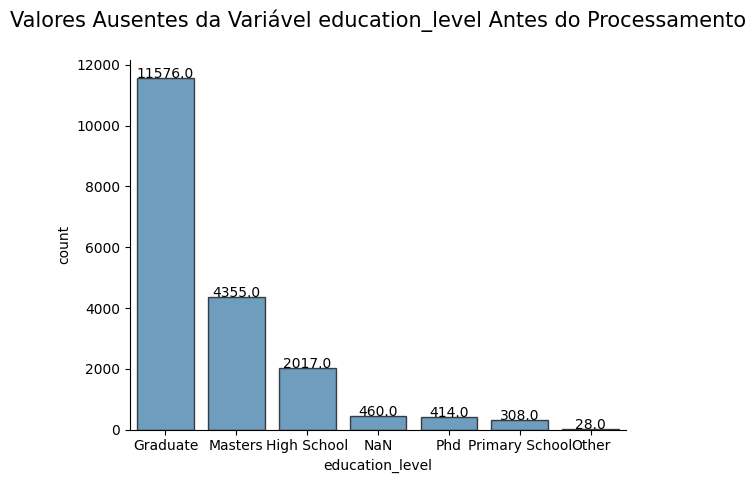

In [113]:
# Fazendo o gráfico antes do processamaneto
sns.countplot(data=new_df.fillna('NaN'), x='education_level',
              alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                p.get_height()), ha='center', color='black', size=10)
plt.title(
    "Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize=15)
plt.show()

In [114]:
# Fazendo o Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [115]:
# Fazendo a Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

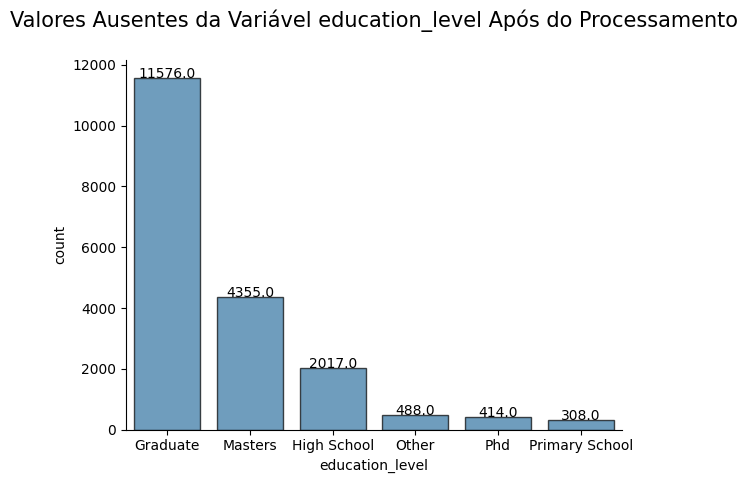

In [116]:
# Fazendo o gráfico apos o processamento
sns.countplot(data=new_df.fillna('NaN'), x='education_level',
              alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,
                p.get_height()), ha='center', color='black', size=10)
plt.title(
    "Valores Ausentes da Variável education_level Após do Processamento\n", fontsize=15)
plt.show()

In [117]:
# Verificando nossa tabela
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience


In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [119]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [120]:
# Contagem de valores ausentes
new_df['experience'].isnull().sum()

63

A porcentagem de valores ausentes é muito baixa, portanto não nos influenciará muito

Vale mais a pena deletar esses registros


In [121]:
# Deletando valores ausentes
new_df = new_df.dropna()

In [122]:
# Reconferindo o percentual de valores ausentes
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

Agora temos um DataFrame somente com as colunas relevantes( Determinadas pela Seleção de Recursos ) e com dados sem a presença de valores ausentes!


## <font color='blue'>Ajustes Finais </font>


In [123]:
# Verificando minha tabela
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [124]:
# Ajustando os dados na variável enrolled_university
new_df['enrolled_university'] = new_df['enrolled_university'].replace(
    'no_enrollment', 'No enrollment')

In [125]:
# Variáveis de entrada
x = new_df.drop(columns=['target'])
# Variáveis de saida
y = new_df['target']

In [126]:
# Verificar minha tabela
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


## <font color='blue'>FIM</font>
